# Data Exploration

In this notebook, we will look at the chant data and explore its statistics. The original corpus is the Cantus Corpus and it can be found here: https://github.com/bacor/cantuscorpus. The corpus contains almost 0.5 million datapoints. We filtered out those which don't have either melody (in the 'volpiano' column) or full text ('full_text'), and additionaly those whose melody and text can't be properly aligned. The resulting dataset contains some 13,000 datapoints.

In [1]:
# imports
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
# create dataframe from the csv file
path = '../../cantuscorpus-v0.2/csv/aligned.csv'
df = pd.read_csv(path, usecols=range(1,23))     # usecols is used to remove an index column which contains indices of the original dataset

In [3]:
# some basic data
print(df.shape)
print(df.columns)
print(df.head())

(13397, 22)
Index(['id', 'incipit', 'cantus_id', 'mode', 'finalis', 'differentia',
       'siglum', 'position', 'folio', 'sequence', 'marginalia',
       'cao_concordances', 'feast_id', 'genre_id', 'office_id', 'source_id',
       'melody_id', 'drupal_path', 'full_text', 'full_text_manuscript',
       'volpiano', 'notes'],
      dtype='object')
             id                     incipit cantus_id mode finalis  \
0  chant_000622  A Christo de caelo vocatus    001188    8     NaN   
1  chant_000636  A Christo de caelo vocatus   007123a    1     NaN   
2  chant_000646  A Christo de caelo vocatus   007123a    1     NaN   
3  chant_000668  A Christo de caelo vocatus   007123a    1     NaN   
4  chant_000924           A deo praelectus*    600006    8     NaN   

  differentia           siglum position folio  sequence  ...    feast_id  \
0           1  F-Pn lat. 12044       3.  053v       5.0  ...  feast_0287   
1         NaN   US-CHNbcbl 097       01  035r       2.0  ...  feast_1321   
2   

Let's look at the different genres in the table.

In [4]:
df.genre_id.value_counts()

genre_a       4888
genre_r       2016
genre_v       1779
genre_w       1129
genre_h        862
genre_i        365
genre_in       306
genre_cm       294
genre_gr       268
genre_av       245
genre_grv      220
genre_tcv      185
genre_hv       172
genre_of       138
genre_ofv       97
genre_d         75
genre_inv       62
genre_tc        57
genre_va        27
genre_ip        21
genre_alv       16
genre_vahw      12
genre_bd        10
genre_sq         8
genre_cr         7
genre_gl         6
genre_sa         5
genre_ps         5
genre_l          4
genre_al         3
genre_li         2
genre_tp         2
genre_pn         2
genre_m          1
genre_ite        1
genre_ky         1
genre_ca         1
Name: genre_id, dtype: int64

Genre names can be obtained from a different csv file.

In [5]:
path = '../../cantuscorpus-v0.2/csv/genre.csv'
genres_df = pd.read_csv(path)
genres_df

,id,name,description,mass_or_office
0,genre_?,[?],"Unknown, ambiguous, unidentifiable, illegible","['Mass', 'Office']"
1,genre_a,A,Antiphon,['Office']
2,genre_ag,Ag,Agnus dei,['Mass']
3,genre_al,Al,Alleluia,['Mass']
4,genre_alv,AlV,Alleluia verse,['Mass']
5,genre_av,AV,Antiphon verse,['Office']
6,genre_bd,BD,Benedicamus domino,"['Mass', 'Office']"
7,genre_ca,Ca,Canticle,"['Mass', 'Office']"
8,genre_cap,Cap,Capitulum,['Office']
9,genre_cav,CaV,Canticle verse,"['Mass', 'Office']"


From this point on, we are interested only in the genres that have at least 100 examples in our dataset.

Let's look at the histogram of genres.

In [6]:
genre_list = df.genre_id.value_counts().index[df.genre_id.value_counts() >= 100].values

<AxesSubplot:>

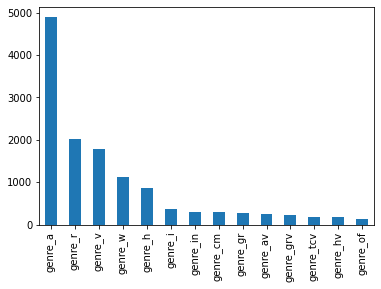

In [7]:
df['genre_id'].value_counts()[genre_list].plot(kind='bar')

Now, find the distribution of number of words.

array([[<AxesSubplot:title={'center':'word_count'}>]], dtype=object)

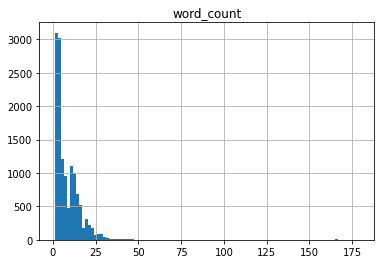

In [8]:
df.assign(word_count=lambda x: x.full_text.str.split().apply(len)).hist('word_count', bins=100)

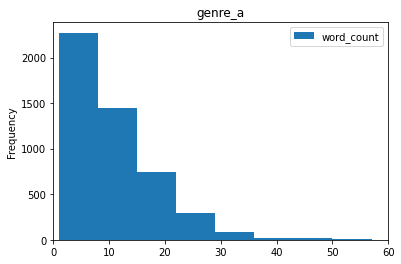

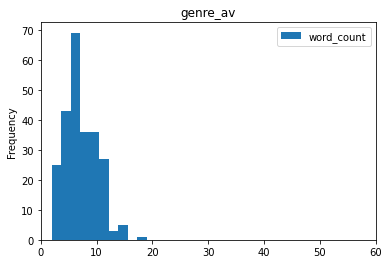

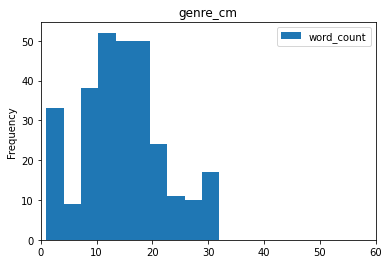

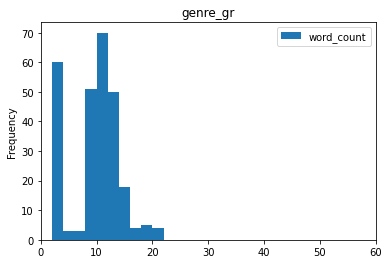

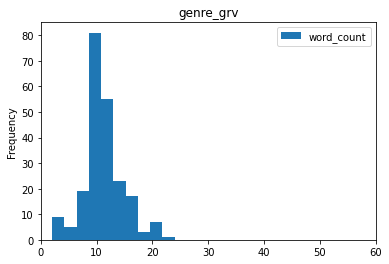

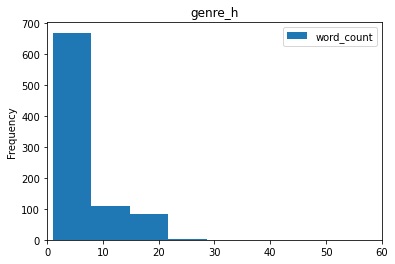

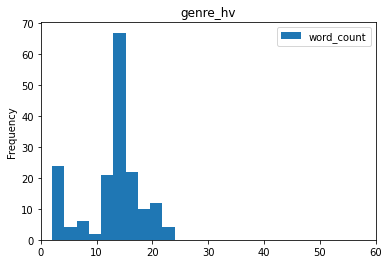

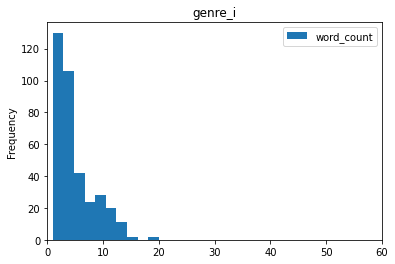

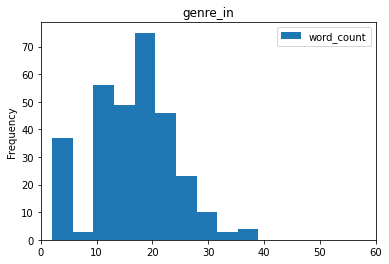

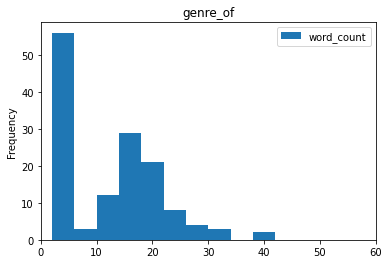

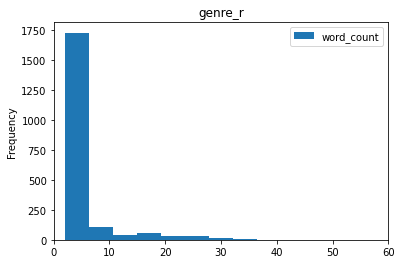

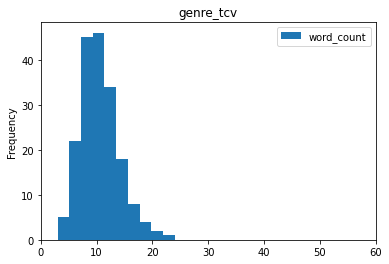

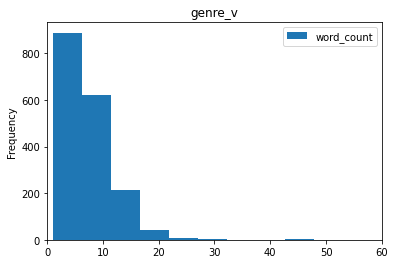

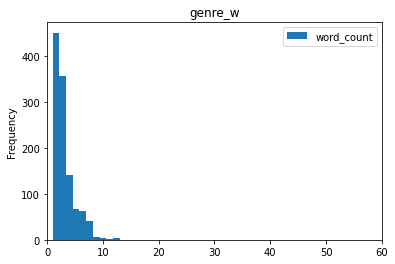

In [9]:
groups = df[df['genre_id'].isin(genre_list)].assign(word_count=lambda x: x.full_text.str.split().apply(len)).groupby('genre_id')
axes = groups.plot(kind='hist', y='word_count', xlim=(0, 60))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

We can do the same for melody (i.e. 'volpiano') length.

array([[<AxesSubplot:title={'center':'mel_len'}>]], dtype=object)

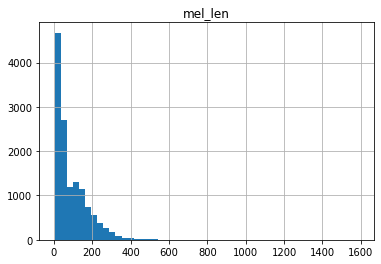

In [10]:
df.assign(mel_len=lambda x: x.volpiano.str.len()).hist('mel_len', bins=50)

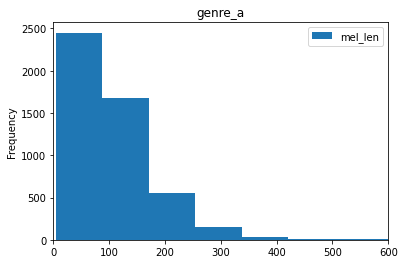

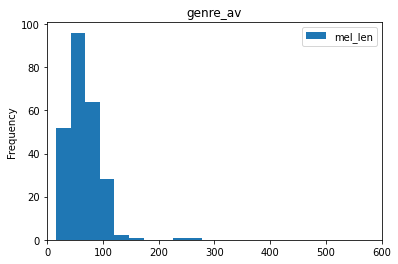

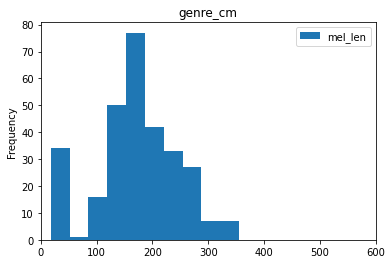

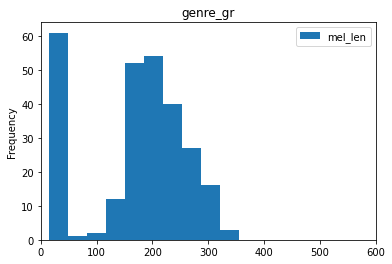

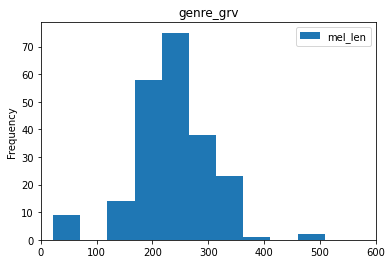

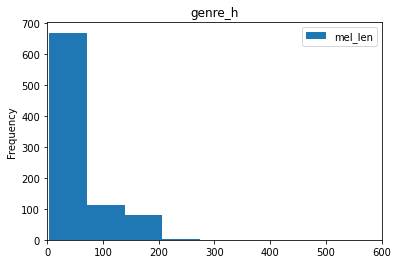

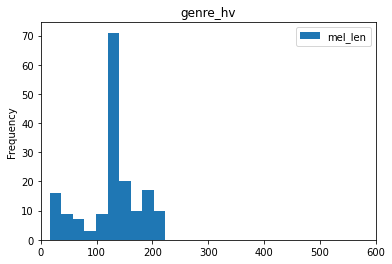

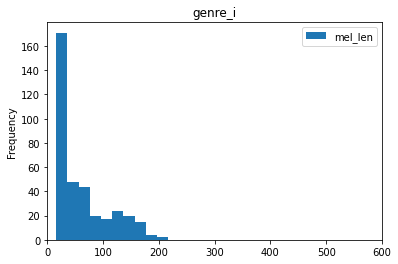

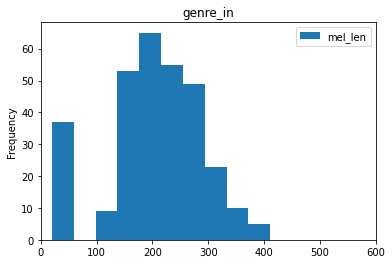

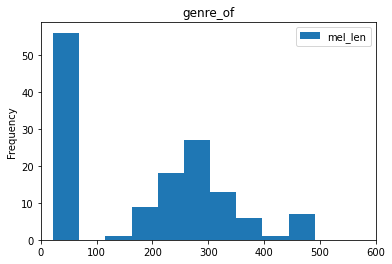

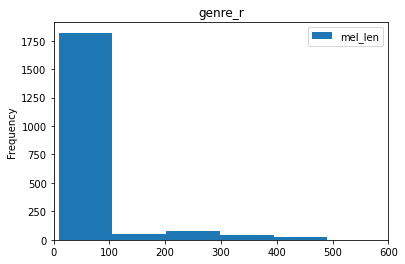

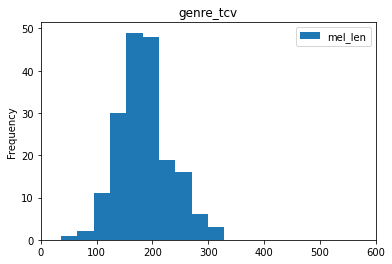

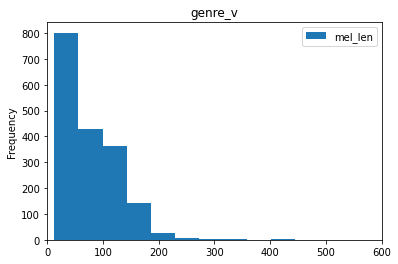

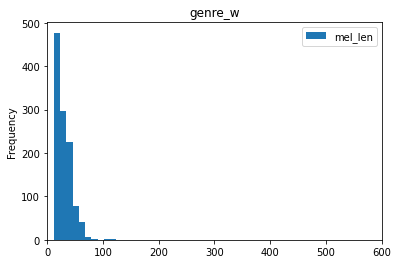

In [11]:
groups = df[df['genre_id'].isin(genre_list)].assign(mel_len=lambda x: x.volpiano.str.len()).groupby('genre_id')
axes = groups.plot(kind='hist', y='mel_len', xlim=(0, 600))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

We can check the number of neumes by removing dashes from volpiano, which is equivalent to splitting it by '-'.

array([[<AxesSubplot:title={'center':'mel_len'}>]], dtype=object)

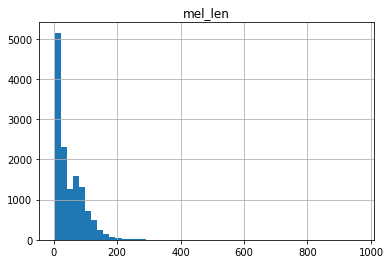

In [12]:
df.assign(mel_len=lambda x: x.volpiano.str.split('-').apply(len) - 1).hist('mel_len', bins=50)

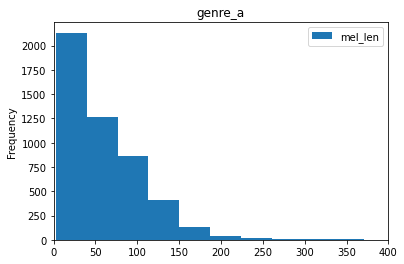

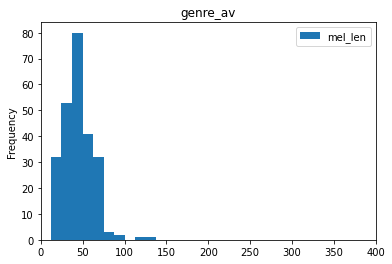

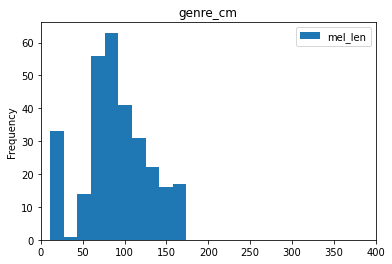

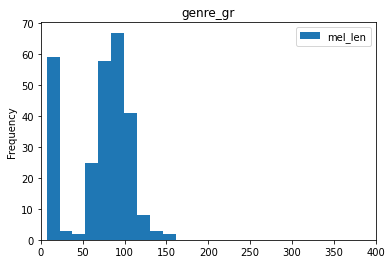

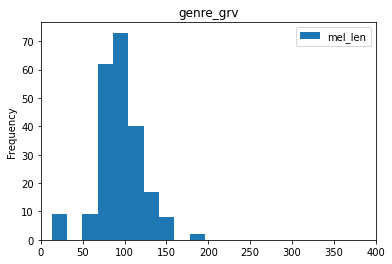

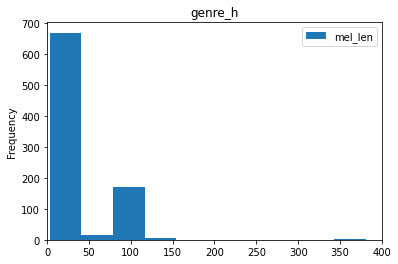

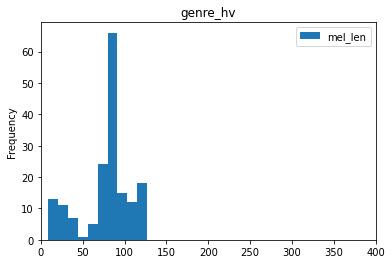

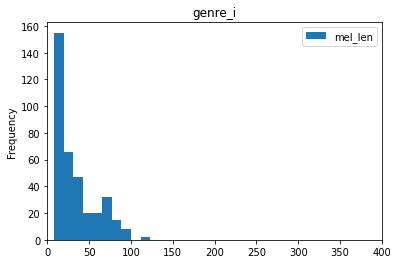

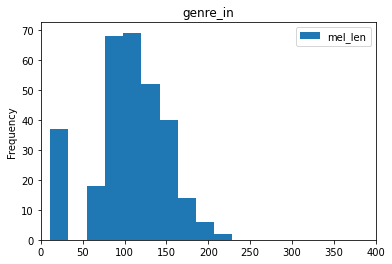

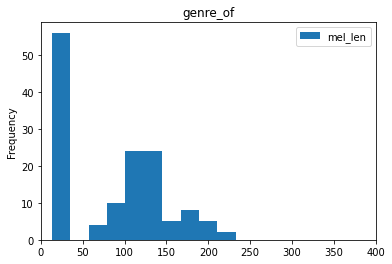

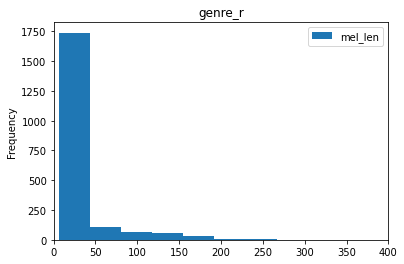

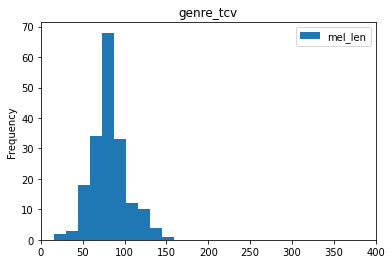

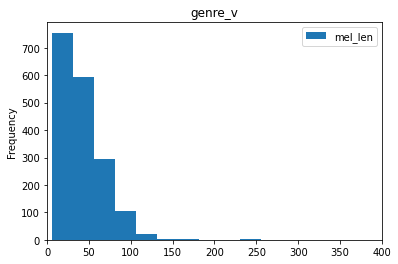

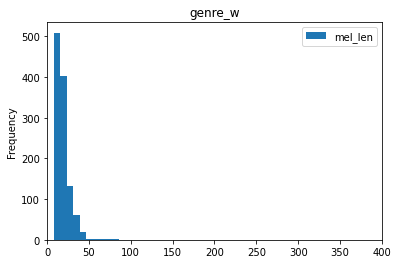

In [13]:
groups = df[df['genre_id'].isin(genre_list)].assign(mel_len=lambda x: x.volpiano.str.split('-').apply(len) - 1).groupby('genre_id')
axes = groups.plot(kind='hist', y='mel_len', xlim=(0, 400))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

Syllables are separated by --.

array([[<AxesSubplot:title={'center':'mel_len'}>]], dtype=object)

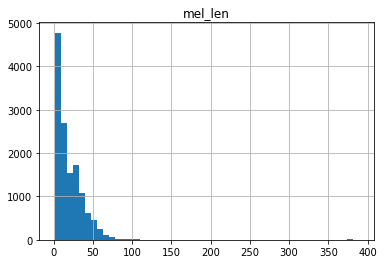

In [14]:
df.assign(mel_len=lambda x: x.volpiano.str.split('--').apply(len) - 1).hist('mel_len', bins=50)

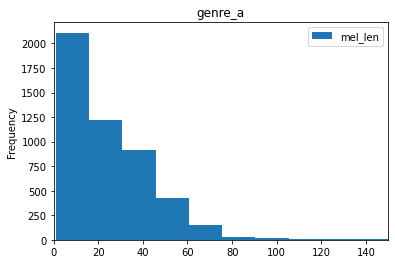

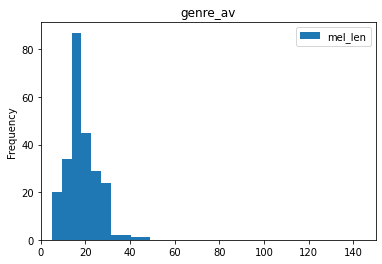

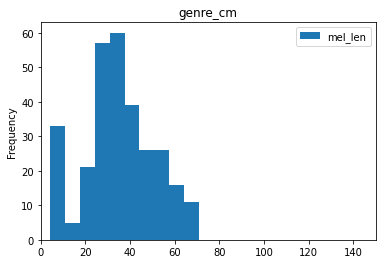

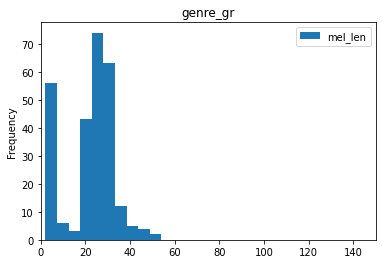

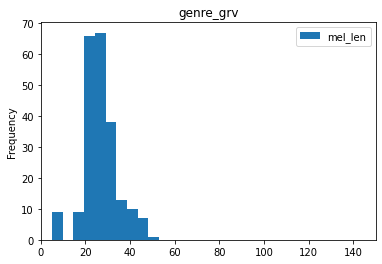

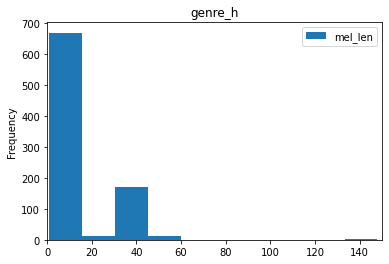

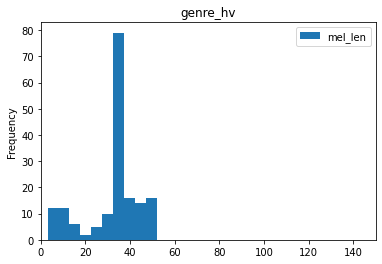

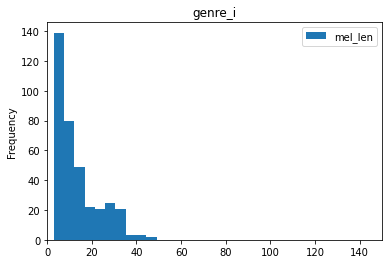

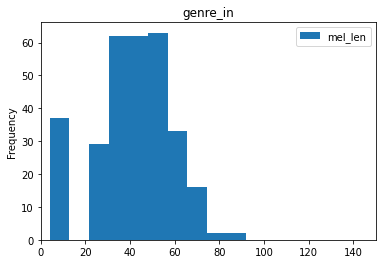

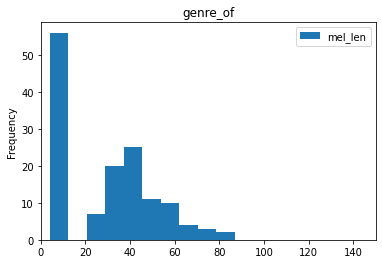

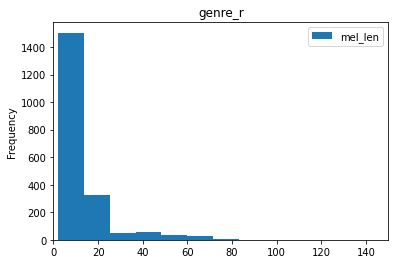

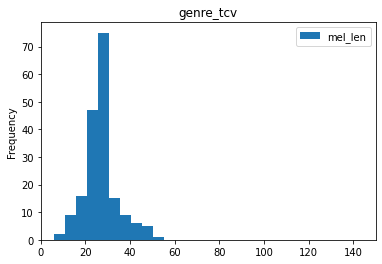

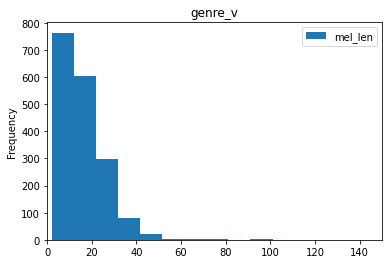

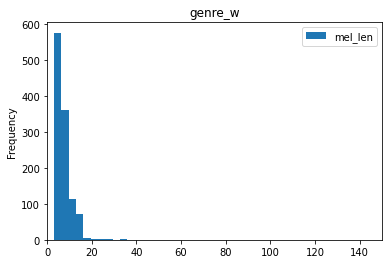

In [15]:
groups = df[df['genre_id'].isin(genre_list)].assign(mel_len=lambda x: x.volpiano.str.split('--').apply(len) - 1).groupby('genre_id')
axes = groups.plot(kind='hist', y='mel_len', xlim=(0, 150))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

Words are separated by ---

array([[<AxesSubplot:title={'center':'mel_len'}>]], dtype=object)

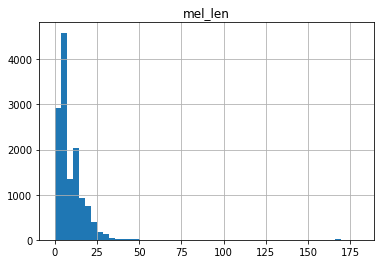

In [16]:
df.assign(mel_len=lambda x: x.volpiano.str.split('---').apply(len) - 1).hist('mel_len', bins=50)

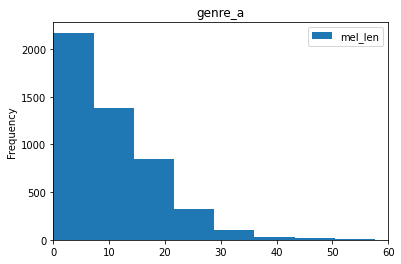

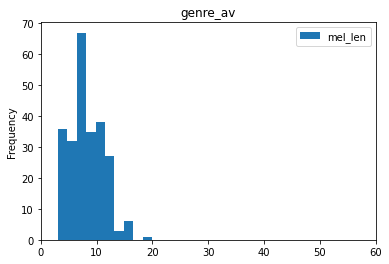

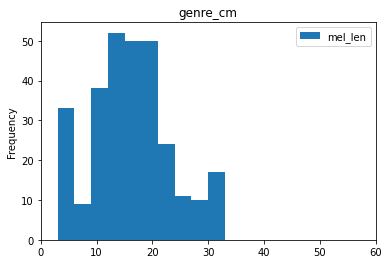

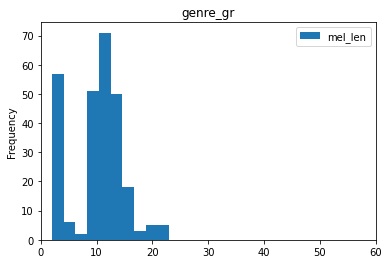

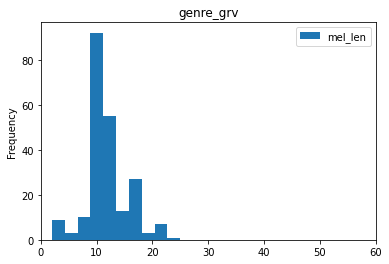

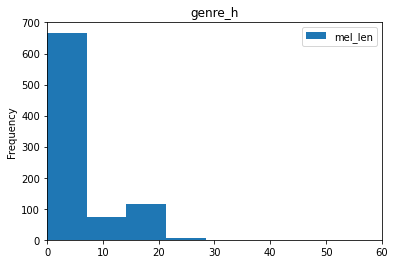

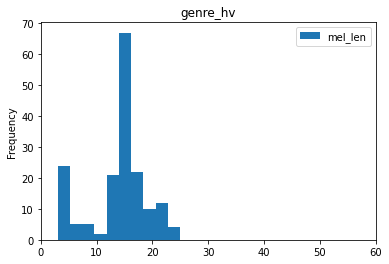

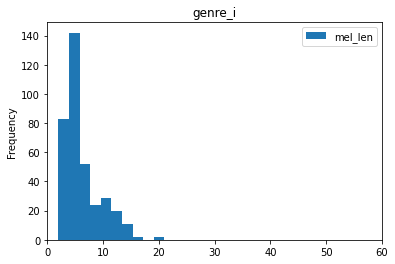

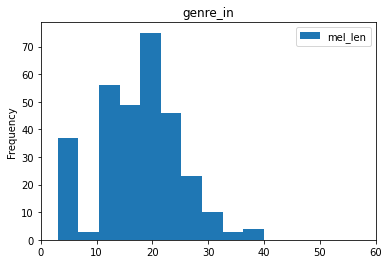

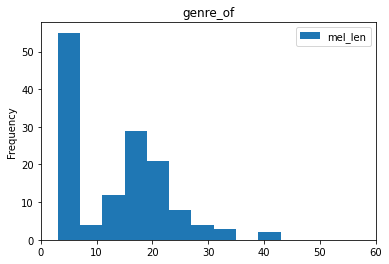

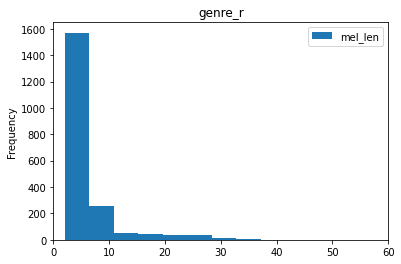

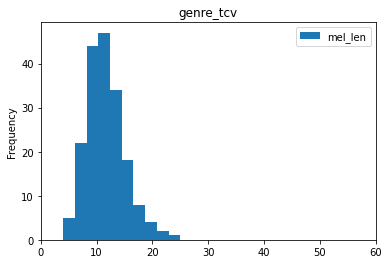

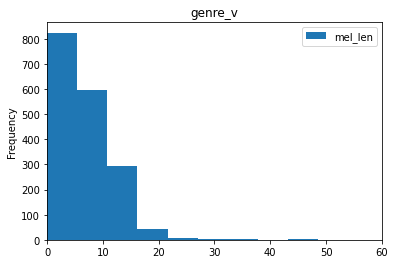

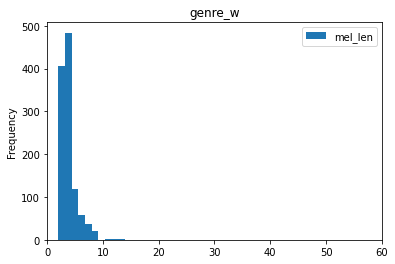

In [17]:
groups = df[df['genre_id'].isin(genre_list)].assign(mel_len=lambda x: x.volpiano.str.split('---').apply(len) - 1).groupby('genre_id')
axes = groups.plot(kind='hist', y='mel_len', xlim=(0, 60))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

Compare the ratio of words in the text to words in the volpiano.

array([[<AxesSubplot:title={'center':'ratio'}>]], dtype=object)

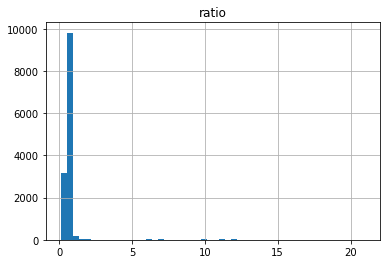

In [18]:
df.assign(ratio=lambda x: (x.full_text.str.split().apply(len)) / (x.volpiano.str.split('---').apply(len))).hist('ratio', bins=50)

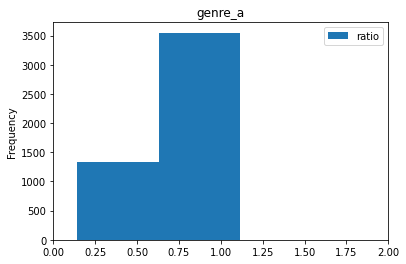

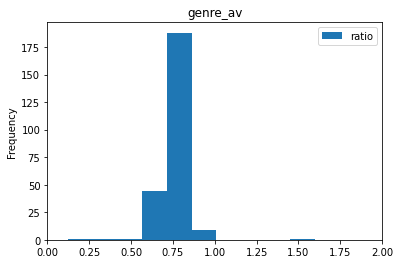

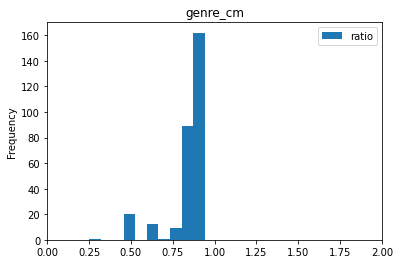

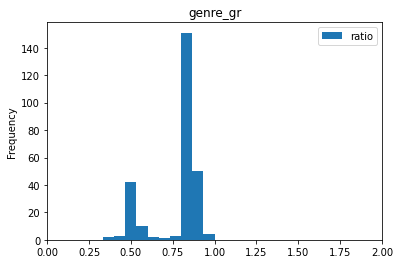

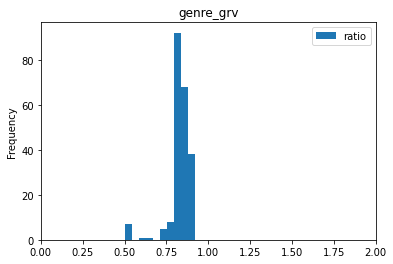

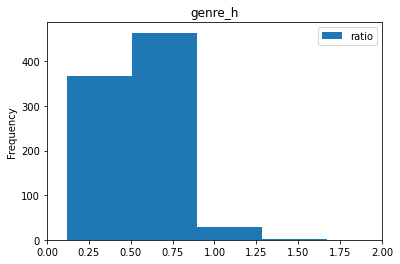

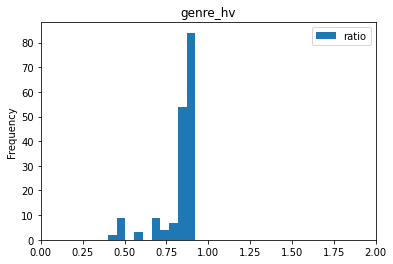

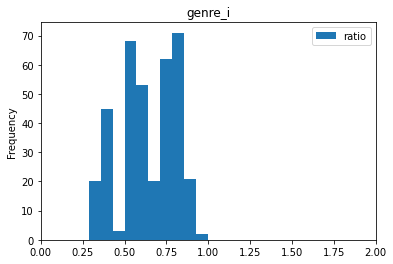

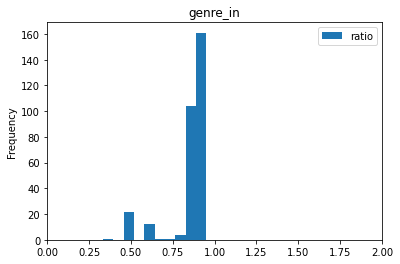

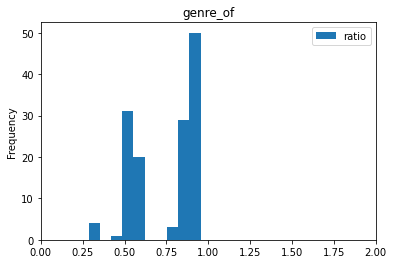

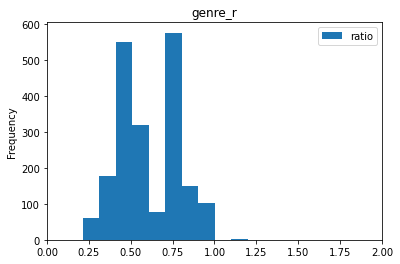

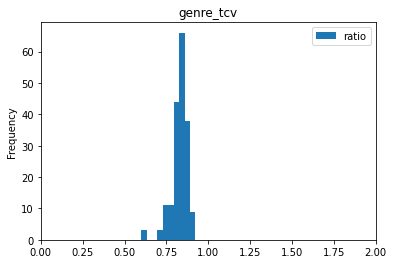

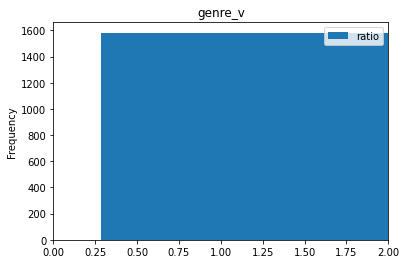

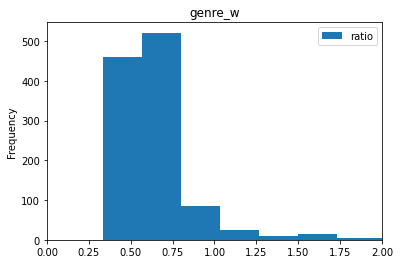

In [19]:
groups = df[df['genre_id'].isin(genre_list)].assign(ratio=lambda x: (x.full_text.str.split().apply(len)) / (x.volpiano.str.split('---').apply(len))).groupby('genre_id')
axes = groups.plot(kind='hist', y='ratio', xlim=(0, 2), bins=10)
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

In [27]:
large_genres = df[df['genre_id'].isin(genre_list)]
text_lengths = large_genres.assign(text_length_mean=lambda x: (x.full_text.str.split().apply(len)))
text_lengths.groupby('genre_id').mean()

,sequence,cao_concordances,text_length_mean
genre_id,,,
genre_a,7.600450,NaN,9.858020
genre_av,5.179592,NaN,7.359184
genre_cm,3.353741,NaN,14.632653
genre_gr,3.645522,NaN,9.235075
genre_grv,3.209091,NaN,10.936364
genre_h,7.307425,NaN,5.232019
genre_hv,8.145349,NaN,12.831395
genre_i,6.926027,NaN,4.720548
genre_in,3.921569,NaN,16.549020


In [28]:
text_lengths.groupby('genre_id').std()

,sequence,cao_concordances,text_length_mean
genre_id,,,
genre_a,6.892413,NaN,8.022088
genre_av,3.331480,NaN,2.891758
genre_cm,2.835183,NaN,7.115893
genre_gr,3.279333,NaN,4.491436
genre_grv,2.122269,NaN,3.664658
genre_h,6.650520,NaN,5.479303
genre_hv,6.683035,NaN,5.193400
genre_i,6.284247,NaN,3.505685
genre_in,4.996431,NaN,7.501205


In [31]:
melody_lengths = large_genres.assign(mel_length=lambda x: (x.volpiano.str.replace('-','').apply(len)))
melody_lengths.groupby('genre_id').mean()

,sequence,cao_concordances,mel_length
genre_id,,,
genre_a,7.600450,NaN,38.279869
genre_av,5.179592,NaN,22.469388
genre_cm,3.353741,NaN,82.561224
genre_gr,3.645522,NaN,99.100746
genre_grv,3.209091,NaN,141.759091
genre_h,7.307425,NaN,18.966357
genre_hv,8.145349,NaN,50.709302
genre_i,6.926027,NaN,28.032877
genre_in,3.921569,NaN,99.395425


In [32]:
melody_lengths.groupby('genre_id').std()

,sequence,cao_concordances,mel_length
genre_id,,,
genre_a,6.892413,NaN,36.800996
genre_av,3.331480,NaN,13.048934
genre_cm,2.835183,NaN,35.961033
genre_gr,3.279333,NaN,54.376833
genre_grv,2.122269,NaN,44.743012
genre_h,6.650520,NaN,22.426393
genre_hv,6.683035,NaN,21.932574
genre_i,6.284247,NaN,24.637348
genre_in,4.996431,NaN,41.940205


In [34]:
new_genres = large_genres.assign(text_length=lambda x: (x.full_text.str.split().apply(len))).assign(mel_length=lambda x: (x.volpiano.str.replace('-','').apply(len)))
new_genres.head()

,id,incipit,cantus_id,mode,finalis,differentia,siglum,position,folio,sequence,...,office_id,source_id,melody_id,drupal_path,full_text,full_text_manuscript,volpiano,notes,text_length,mel_length
0,chant_000622,A Christo de caelo vocatus,001188,8,NaN,1,F-Pn lat. 12044,3.,053v,5.0,...,office_m,source_014,NaN,http://cantus.uwaterloo.ca/chant/399542/,A Christo de caelo vocatus et in terram prostr...,A xpisto de caelo vocatus et in terram prostra...,1---g---g-kk--h---g---h--g---f--gh--g---g---g-...,NaN,15,50
1,chant_000636,A Christo de caelo vocatus,007123a,1,NaN,NaN,US-CHNbcbl 097,01,035r,2.0,...,office_m,source_069,NaN,http://cantus.uwaterloo.ca/chant/665425/,A Christo de caelo vocatus,NaN,1--h---h--hghgf---g---g--g---g--gh--g---,NaN,5,15
2,chant_000646,A Christo de caelo vocatus,007123a,1,NaN,NaN,D-KA Aug. LX,01,125r,2.0,...,office_m,source_414,NaN,http://cantus.uwaterloo.ca/chant/617583/,A Christo de caelo vocatus et in terram prostr...,A xpisto de celo vocatus et in terram prostrat...,1---h-h---hg--hg-gf7---g---g--g---g--gh--g---g...,NaN,15,68
3,chant_000668,A Christo de caelo vocatus,007123a,1,NaN,NaN,A-KN 1018,01,071v,3.0,...,office_m,source_265,NaN,http://cantus.uwaterloo.ca/chant/293103/,A Christo de caelo vocatus et in terram prostr...,A christo de celo vocatus et in terram prostra...,1---dh---h--hg-hgg---g---g--g---g--gh--g---g--...,NaN,15,68
4,chant_000924,A deo praelectus*,600006,8,NaN,NaN,NL-Uu 406,NaN,196r,8.0,...,office_v2,source_573,NaN,http://cantus.uwaterloo.ca/chant/497010/,A deo praelectus*,A deo preelectus,1---g---g--ffg---gge---3,NaN,3,10


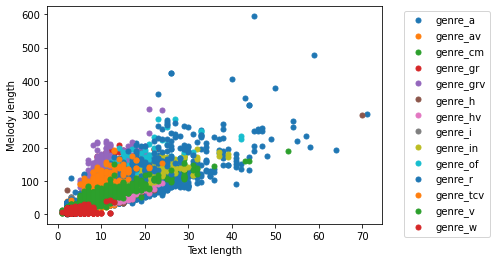

In [40]:
import matplotlib.pyplot as plt
groups = new_genres.groupby('genre_id')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.text_length, group.mel_length, marker='o', linestyle='', ms=5, label=name)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel("Text length")
ax.set_ylabel("Melody length")

plt.show()

<AxesSubplot:>

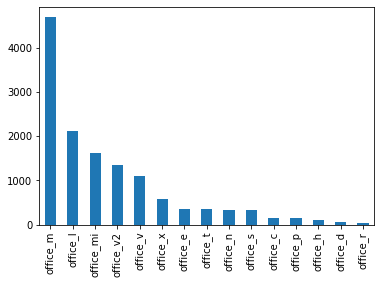

In [41]:
df['office_id'].value_counts().plot(kind='bar')

In [42]:
new_offices = df.assign(text_length=lambda x: (x.full_text.str.split().apply(len))).assign(mel_length=lambda x: (x.volpiano.str.replace('-','').apply(len)))
new_offices.head()

,id,incipit,cantus_id,mode,finalis,differentia,siglum,position,folio,sequence,...,office_id,source_id,melody_id,drupal_path,full_text,full_text_manuscript,volpiano,notes,text_length,mel_length
0,chant_000622,A Christo de caelo vocatus,001188,8,NaN,1,F-Pn lat. 12044,3.,053v,5.0,...,office_m,source_014,NaN,http://cantus.uwaterloo.ca/chant/399542/,A Christo de caelo vocatus et in terram prostr...,A xpisto de caelo vocatus et in terram prostra...,1---g---g-kk--h---g---h--g---f--gh--g---g---g-...,NaN,15,50
1,chant_000636,A Christo de caelo vocatus,007123a,1,NaN,NaN,US-CHNbcbl 097,01,035r,2.0,...,office_m,source_069,NaN,http://cantus.uwaterloo.ca/chant/665425/,A Christo de caelo vocatus,NaN,1--h---h--hghgf---g---g--g---g--gh--g---,NaN,5,15
2,chant_000646,A Christo de caelo vocatus,007123a,1,NaN,NaN,D-KA Aug. LX,01,125r,2.0,...,office_m,source_414,NaN,http://cantus.uwaterloo.ca/chant/617583/,A Christo de caelo vocatus et in terram prostr...,A xpisto de celo vocatus et in terram prostrat...,1---h-h---hg--hg-gf7---g---g--g---g--gh--g---g...,NaN,15,68
3,chant_000668,A Christo de caelo vocatus,007123a,1,NaN,NaN,A-KN 1018,01,071v,3.0,...,office_m,source_265,NaN,http://cantus.uwaterloo.ca/chant/293103/,A Christo de caelo vocatus et in terram prostr...,A christo de celo vocatus et in terram prostra...,1---dh---h--hg-hgg---g---g--g---g--gh--g---g--...,NaN,15,68
4,chant_000924,A deo praelectus*,600006,8,NaN,NaN,NL-Uu 406,NaN,196r,8.0,...,office_v2,source_573,NaN,http://cantus.uwaterloo.ca/chant/497010/,A deo praelectus*,A deo preelectus,1---g---g--ffg---gge---3,NaN,3,10


In [43]:
new_offices.groupby('office_id').mean()

,sequence,cao_concordances,text_length,mel_length
office_id,,,,
office_c,7.509677,NaN,9.800000,38.696774
office_d,7.729167,NaN,5.000000,19.916667
office_e,5.958791,NaN,13.967033,50.010989
office_h,5.061404,NaN,14.201754,65.763158
office_l,7.649553,NaN,8.283090,30.405087
office_m,6.872259,NaN,6.866511,33.752395
office_mi,3.424522,NaN,13.088108,102.831177
office_n,9.934132,NaN,5.383234,19.805389
office_p,7.478571,NaN,4.942857,18.392857


In [44]:
new_offices.groupby('office_id').std()

,sequence,cao_concordances,text_length,mel_length
office_id,,,,
office_c,5.420461,NaN,8.275610,37.485127
office_d,6.146231,NaN,2.641727,20.229359
office_e,4.447546,NaN,8.770035,33.738010
office_h,2.743569,NaN,7.310049,37.403162
office_l,6.842005,NaN,6.366399,24.948992
office_m,6.177619,NaN,9.985310,43.723089
office_mi,3.160182,NaN,10.319448,54.812086
office_n,6.531640,NaN,4.581903,16.897887
office_p,5.740764,NaN,4.519775,20.417124


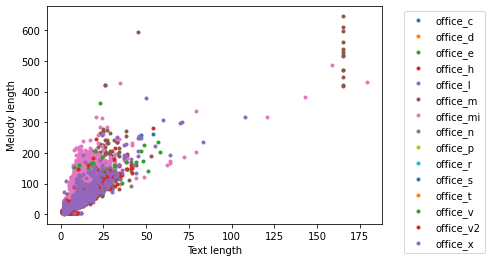

In [47]:
import matplotlib.pyplot as plt
groups = new_offices.groupby('office_id')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.text_length, group.mel_length, marker='o', linestyle='', ms=3, label=name)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel("Text length")
ax.set_ylabel("Melody length")

plt.show()